In [1]:
# 忽略警告訊息
import warnings
warnings.filterwarnings("ignore")

# 分類 (Classification)

## 線性迴歸 (Linear Regression) 與 羅吉斯迴歸 (Logistic Regression)

![](https://miro.medium.com/v2/resize:fit:1400/1*F9koiudfoqYIP0sDoZyG4g.png)

參考來源: [https://chih-sheng-huang821.medium.com/機器-統計學習-羅吉斯回歸-logistic-regression-aff7a830fb5d](https://chih-sheng-huang821.medium.com/機器-統計學習-羅吉斯回歸-logistic-regression-aff7a830fb5d)

## 評估方式

### Confusion Matrix (混淆矩陣)

### 二元分類

![](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)

參考來源: [https://encord.com/glossary/confusion-matrix/](https://encord.com/glossary/confusion-matrix/)

### 評估指標 (metric)：Precision, Recall, F1-Score
- Precision: 預測為正且正確的比例
- Recall: 實際為正且正確的比例
- Accuracy: 預測正確的比例
- F1 Score: Precision 與 Recall 的調和平均數

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

## 讀取資料集

![](https://biologyreader.com/wp-content/uploads/2022/05/sepal.jpg)
![](https://biologyreader.com/wp-content/uploads/2022/05/petal.jpg)

參考來源: https://biologyreader.com/difference-between-sepals-and-petals.html

In [ ]:
# 讀取 iris 資料集
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

'''
欄位說明:
sepal length (cm) 
sepal width (cm) 
petal length (cm) 
petal width (cm)  
species (target)
'''

# 讀取資料
df = pd.read_csv('./ex3-1.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
# 切分訓練集/測試集
X = df.iloc[:, 0:4] # 等同於 df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df.iloc[:, 4] # 等同於 df.loc[:, 'species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 預覽特徵資料
X_train.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


## 多元分類器
-  OvR 策略指的是 「一對餘」（One-vs-Rest） 策略。這種方法將多類別分類問題轉化為多個二元分類問題，對於**每個類別都訓練一個分類器**（例如水系寶可夢跟非水系寶可夢）。每個分類器都學習如何區分「該類別」與「其他所有類別」。在預測時，將輸入數據通過所有分類器，選擇得分最高的那個分類器所對應的類別作為最終預測結果。
- OvO 策略指的是 「一對一」（One-vs-One） 策略。這種方法將多類別分類問題轉化為多個二元分類問題，為每一對類別（**任取兩個類別**）組合訓練一個分類器。具體而言，假設有 N 個分類器，則需要訓練 $\frac{N(N-1)}{2}$ 。每個分類器都學習如何在兩個特定的類別之間進行區分。當進行預測時，將輸入數據通過所有分類器，採用「投票」機制，選擇得票數最多的類別作為最終預測結果。

In [21]:
from sklearn.linear_model import LogisticRegression

# 建立邏輯斯迴歸模型(預設為 OvR 策略)
logit = LogisticRegression()

# 訓練模型
logit.fit(X_train, y_train)

# 計算測試數據和標籤的平均準確率
logit.score(X_test, y_test)

0.9736842105263158

In [22]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# 建立邏輯斯迴歸模型
logit = LogisticRegression()

# OvR策略應用二元分類器到多元分類，初始化需傳入分類的模型
ovr = OneVsRestClassifier(logit)
ovr.fit(X_train, y_train)
print('OvR:', ovr.score(X_test, y_test))

# OvO策略應用二元分類器到多元分類，初始化需傳入分類的模型
ovo = OneVsOneClassifier(logit)
ovo.fit(X_train, y_train)
print('OvO:', ovo.score(X_test, y_test))

OvR: 0.9473684210526315
OvO: 0.9736842105263158


有關 solver 參數的選擇:
- 對於小型數據集，liblinear 是一個不錯的選擇，而對於大型數據集，sag 和 saga 速度更快，只是 sag 對特徵的尺度很敏感，特徵標準化就很重要；對於多分類問題，只有 newton-cg、sag、saga 和 lbfgs 可以處理多項式損失；在 LogisticRegressionCV 中，liblinear 可能會比較慢，因為它不支持 warm-starting。
- liblinear 和 newton-cholesky 預設只能處理二元分類。要在多分類設定中應用一對餘（one-versus-rest）策略，可以使用 OneVsRestClassifier 封裝它。
- newton-cholesky 對於樣本數遠大於特徵數（n_samples >> n_features）的情況是個不錯的選擇，特別是當使用帶有稀有類別的獨熱編碼（one-hot encoded）分類特徵時。請注意，該解算器的內存使用量對於特徵數（n_features）有二次方的依賴，因為它需要顯式計算海森矩陣（Hessian matrix）。

In [76]:
# 邏輯斯迴歸，類別大於 3 個時，採多項分布(multinomial)
lr2 = LogisticRegression(
    multi_class="multinomial", # 小於 3 個類別時，可選擇 ovr。預設 auto
    solver="newton-cg", # 選擇優化器
)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

d:\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


0.6026785714285714

### 多項式羅吉斯迴歸 (Multinomial Logistic Regression)
- 這個策略是先選定一個參考類別 (reference class)，其餘類別皆與參考類別參考類別進行二元羅吉斯迴歸，得到迴歸係數，再將結果透過歸一化指數函數 (softmax function) 轉換為機率值 (機率分布)，接著就能算出待測樣本被分類到各類別的機率。

![](https://i.imgur.com/neaZ6ZR.png)

![](https://i.imgur.com/9tPHtqO.png)

![](https://i.imgur.com/7GYryEj.png)

## 分類結果的可靠度

In [28]:
lr = LogisticRegression(
    multi_class='ovr'
)
lr.fit(X_train, y_train)

# 取得分類項目
print(lr.classes_)

# 模型對預測某個樣本為所屬類別的強度，有正負之分，
# 正值表示屬於該類別的可能性越高，負值表示屬於該類別的可能性越低
print('Decision function:') 
print(lr.decision_function(X_test)[:6, :])

# 模型對預測某個樣本為所屬類別的機率
# 機率值為 0 到 1 之間，且總和為 1
print('Predicted probabilities:')
print(lr.predict_proba(X_test)[:6, :])

['setosa' 'versicolor' 'virginica']
Decision function:
[[ -7.13363061  -0.91866866   2.38199943]
 [ -4.00838172   0.91784364  -3.19390233]
 [  4.20971434  -3.45501646 -12.61491569]
 [ -9.79122793  -0.16761951   3.92100316]
 [  3.578755    -1.75608208 -11.81277183]
 [ -9.02023752  -1.54239746   4.64489725]]
Predicted probabilities:
[[6.63504751e-04 2.37400071e-01 7.61936424e-01]
 [2.31120818e-02 9.25846276e-01 5.10416426e-02]
 [9.69859012e-01 3.01377182e-02 3.26979862e-06]
 [3.88772119e-05 3.18452071e-01 6.81509052e-01]
 [8.68507887e-01 1.31485499e-01 6.61460932e-06]
 [1.03637232e-04 1.51001627e-01 8.48894736e-01]]


d:\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [30]:
# 預測結果
print(lr.predict(X_test)[:6])

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica']


## 評估分類器的效能

### 羅吉斯迴歸 (Logistic Regression)

- 把一個事件的「勝算比」 (odds ratio) 表示成「**事件發生的機率 p**」與「**事件不發生的機率 1-p**」，則發生的機率與不發生的機率的比值為 $\frac{p}{1-p}$，取對數後為 logit(p) = $\log(\frac{p}{1-p})$。
- logit 函數的輸入為 0 ~ 1 之間的數值，輸出為實數，該函數可以用來表達特徵與勝算比之間的線性關係：$logit(p(y=class 1|x)) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ = $\sum_{i=0}^{n}w_{i}x_{i}$，$w_{i}$ 是特徵 x 的權重，$x_{i}$ 是特徵 x 的值。
- 其中 $logit(p(y=class 1|x))$ 是某樣本在已知特徵 x 下，class 屬於 1 的機率，可以透過它的反函數「**sigmoid 函數**」轉換為 0 ~ 1 之間的機率值：$p(y=class 1|x) = \frac{1}{1+e^{-\sum_{i=0}^{n}w_{i}x_{i}}}$。

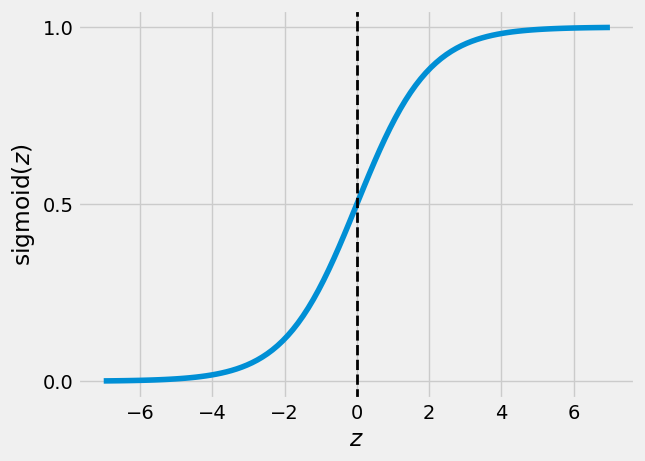

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 定義 sigmoid 函數
def sigmoid(z):
    return 1.0 / ( 1.0 + np.exp(-z) )

# 產生 -7 到 7 之間的數據 (給 x ticks 用)
z = np.linspace(-7, 7, 100)

# 繪製 sigmoid 函數
plt.plot(z, sigmoid(z))

# 加上 x = 0 的垂直線
plt.axvline(0., color='black', ls='--', lw=2)

# x 的標籤
plt.xlabel('$z$')

# y 的標籤
plt.ylabel('sigmoid($z$)')

# x 軸範圍
plt.yticks([0., 0.5, 1.])

plt.show()

## 訓練邏輯斯迴歸模型

In [ ]:
import pandas as pd

# 讀取資料集 (寶可夢)
df = pd.read_csv('ex3-2.csv')

# 當 Type2 不為空時，則 hasType2 為 1，否則為 0，當作 label
df['hasType2'] = df['Type2'].notnull().astype(int)

print('雙屬性的數量：', df['hasType2'].sum())
print('單屬性的數量：', df.shape[0] - df['hasType2'].sum())

# 顯示後 3 筆資料
df.tail(3)

雙屬性的數量： 473
單屬性的數量： 421


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
891,805,壘磊石,Rock,Steel,61,131,211,53,101,13,7,False,1
892,806,砰頭小丑,Fire,Ghost,53,127,53,151,79,107,7,False,1
893,807,捷拉奧拉,Electric,NaN,88,112,75,102,80,143,7,False,0


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 特徵資料為 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
# 標籤資料為 hasType2
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('|雙屬性|/|訓練集| =', y_train.sum()/y_train.size)
print('|雙屬性|/|測試集| =', y_test.sum()/y_test.size)

# 建立邏輯斯迴歸模型
logit = LogisticRegression()
logit.fit(X_train, y_train)

# 計算測試數據和標籤的平均準確率
logit.score(X_test, y_test)

|雙屬性|/|訓練集| = 0.5134328358208955
|雙屬性|/|測試集| = 0.5758928571428571


0.6026785714285714

[0 1]
84


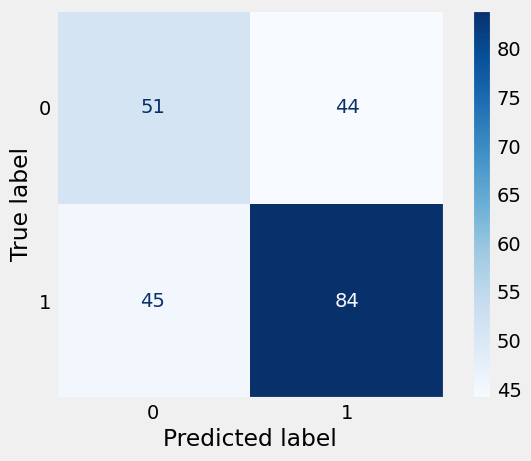

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 預測測試集
y_pred = logit.predict(X_test)

# 類別標籤
print(logit.classes_)

# 混淆矩陣
cm = confusion_matrix(
    y_test, # 測試資料集的真實標籤
    y_pred, # 你用測試資料集預測的結果
    labels=logit.classes_ # 類別標籤
)

# 驗證是否正確
count = 0
y_arr_test = y_test.to_numpy()
for i, pred in enumerate(y_pred):
    if pred == 1 and y_arr_test[i] == 1:
        count += 1
print(count)

# 繪製混淆矩陣
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=logit.classes_ # 這個不加也可以
)

# 顯示混淆矩陣, cmap 可以改變顏色 
disp.plot(cmap=plt.cm.Blues)

plt.grid()

In [ ]:
from sklearn.model_selection import cross_val_score

# 進行 k 次交叉驗證 (default k=5)
cvs = cross_val_score(
    logit, 
    X_test, 
    y_test, 
    cv=5, # 交叉驗證次數
    scoring='accuracy' # 還有其他的 scoring 可以選擇，例如 'f1', 'precision', 'recall'
)

# 顯示每次交叉驗證的準確率
print(cvs)

# 顯示平均準確率
print(cvs.mean())

[0.51111111 0.71111111 0.55555556 0.57777778 0.54545455]
0.5802020202020202


In [ ]:
# 進行 k 次交叉驗證 (default k=5)
cvs = cross_val_score(
    logit, 
    X_test, 
    y_test,
    cv=5, # 交叉驗證次數
    scoring='f1'
)

# 顯示每次交叉驗證的 f1
print(cvs)

# 顯示平均 f1
print(cvs.mean())

[0.62068966 0.77966102 0.61538462 0.6779661  0.61538462]
0.6618172009171425


cross_val_score 還可以這麼用: [使用sklearn的cross_val_score進行交叉驗證](https://blog.csdn.net/qq_36523839/article/details/80707678)

scikit-learn 提供的 F1 分數有以下幾種：
- f1：二元分類使用
- f1_macro：計算每個分類F1分數的平均，每個類別的權重相等
- f1_weighted：計算每個分類F1分數的平均，類別權重依該類別大小而定
- f1_micro：不區分類別，直接使用整體的精確度與召回率按公式計算

classification_report 當中數字的計算方法
- [https://blog.csdn.net/weixin_43945848/article/details/122061718](https://blog.csdn.net/weixin_43945848/article/details/122061718)

In [73]:
from sklearn.metrics import classification_report

# 產生分類報告
y_pred = logit.predict(X_test)

# 顯示分類報告
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        95
           1       0.66      0.65      0.65       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



### 加入正則化 (Regularization)
- 既然羅吉斯迴歸在建構過程中，同樣要求得到迴歸係數，那麼也能模仿之前的線性迴歸加入㣲罰項 $\alpha$，以降低模型變異性，提高泛化能力。
- 可以透過 L1 正則化 (Lasso) 或 L2 正則化 (Ridge) 來實現，這兩種正則化的差異在於 L1 正則化會將不重要的特徵權重降為 0 (換個角度想，也就是挑選較少的特徵以提高泛化能力)，而 L2 正則化則會將不重要的特徵權重降低但不會降為 0，也有一個超參數 $\alpha$ 來控制正則化的強度。
- LogisticRegression() 會以 $C = 1 / \alpha$ 來替代 $\alpha$，換言之，要增加正則化強度，就要降低 C 的值，為了能有效地調整參數 $C$，也能結合羅吉斯迴歸與交叉驗證的方式來執行。

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# 先做標準化
scalar = StandardScaler()
scalar = scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

# 預設從 1e-4 ~ 1e4 間產生 10 個 C 值進行交叉驗證
clf = LogisticRegressionCV(
    Cs=10, # 產生 10 個 C 值
    cv=5, # 交叉驗證次數
    penalty='l2' # 正則化項
)

# 訓練模型
clf.fit(X_train_std, y_train)

# 最佳 C 值 (不用額外設定，CV 時會自動選擇，讓 clf 可以直接使用)
print('最佳 C 值：', clf.C_)

# 預測測試集
y_pred = clf.predict(X_test_std)

# 顯示分類報告
print(classification_report(y_test, y_pred))

最佳 C 值： [0.35938137]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        95
           1       0.67      0.65      0.66       129

    accuracy                           0.61       224
   macro avg       0.60      0.60      0.60       224
weighted avg       0.61      0.61      0.61       224



## 支援向量機 (Support Vector Machine, SVM)
- 與羅吉斯迴歸一樣，支援向量機也是一個二元分類器，但是支援向量機的目標是找到一個最佳的超平面 (hyperplane)，使得兩個類別的邊界 (margin) 最大化。
- 除了分類，也可以應用在迴歸 (regression) 與離群值偵測 (outlier detection) 上。

### 線性支援向量機 (Linear SVM)
- 超平面其實是 n 維空間中一一個 n-1 維的平面，例如在 2D 平面上就是一條直線，而在 3D 空間中就是一個平面，以此類推。
- 當資料是線性可分的 (linear separable) 時，支援向量機會找到一個最佳的超平面，使得兩個類別的邊界最大化，這個超平面就是分類的決策邊界 (decision boundary)。
- SVM 試圖在最大化超平面邊距與最小化錯誤分類之間取得平衡點，做法是透過與羅吉斯迴歸一樣的超參數 $C$ 來控制正規化強度，藉由懲罰來調控錯誤分類。
- 當選用 C 值較大時，錯誤分類的懲罰也較大，SVM 會傾向於過度擬合 (overfitting)，而 C 值較小時，對錯誤分類較不在意，模型專注在最大化邊距，SVM 會傾向於過度簡化 (underfitting)。
- 調整 C 值也可以用來控制邊距的大小，進而調整校偏差與變異的平衡，與介面正規化的迴歸時引入的超參數 $\alpha$ 類似。

![](https://i.imgur.com/MBJF4mS.png)

圖：支援向量機示意圖。取自 https://www.tqcplus.org.tw/BookDetail.aspx?CODE=ybXE8pkaiG%20L87%20%206%20w7Yg==

![](https://i.imgur.com/cB0wU3y.png)

圖：不同超參數 C 值對支援向量機邊距的影響。取自 https://www.tqcplus.org.tw/BookDetail.aspx?CODE=ybXE8pkaiG%20L87%20%206%20w7Yg==

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.metrics import classification_report

# 讀取資料集 (寶可夢)
df = pd.read_csv('ex3-2.csv')

# 當 Type2 不為空時，則 hasType2 為 1，否則為 0，當作 label
df['hasType2'] = df['Type2'].notnull().astype(int)

# 特徵資料為 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
# 標籤資料為 hasType2
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=0
)

# 標準化
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 建立 SVM 分類器，設定最大回合數以增加收斂機會
svm = LinearSVC(max_iter=1500)
svm.fit(X_train_std, y_train)

# 產生分類報告
y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

(670, 6) (224, 6)
              precision    recall  f1-score   support

           0       0.54      0.55      0.54        95
           1       0.66      0.65      0.66       129

    accuracy                           0.61       224
   macro avg       0.60      0.60      0.60       224
weighted avg       0.61      0.61      0.61       224



### 加入核函數處理「非線性分類」
- 當資料不是線性可分的 (non-linear separable) 時，支援向量機可以透過核函數 (kernel function) 來將資料投影到更高維度的空間，使得資料在新的空間中變得線性可分。
- RBF (徑向基核函數，Radial Basis Function) 是一個常見的核函數，它可以將資料投影到無限維度的空間，透過一個參數 $\gamma$ 來控制投影的幅度，當 $\gamma$ 越大時，投影的幅度也越大，模型會傾向於過度擬合；反之，當 $\gamma$ 越小時，投影的幅度也越小，模型會傾向於過度簡化。

![](https://i.imgur.com/5yn6RP9.png)
圖：使用核函數擴充支援向量機以產生非線性決策邊界。取自 https://www.tqcplus.org.tw/BookDetail.aspx?CODE=ybXE8pkaiG%20L87%20%206%20w7Yg==

![](https://i.imgur.com/ucZwpXV.jpeg)
圖：使用 RBF 核的支援向量機在不同 C 與 gamma 參數值的分類比較。取自 https://www.tqcplus.org.tw/BookDetail.aspx?CODE=ybXE8pkaiG%20L87%20%206%20w7Yg==

![](https://scikit-learn.org/1.5/_images/sphx_glr_plot_iris_svc_001.png)

參考來源: https://scikit-learn.org/1.5/auto_examples/svm/plot_iris_svc.html

In [78]:
from sklearn.svm import SVC

# 建立 SVM 分類器
svm = SVC(
    kernel='rbf', # 選擇核函數
    C=5, # 懲罰項
    gamma=0.01, # gamma 值
    probability=True # 設定為 True 可以取得預測機率
)

# 訓練模型
svm.fit(X_train_std, y_train)

# 預測測試集
y_pred = svm.predict(X_test_std)

# 產生分類報告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        95
           1       0.67      0.67      0.67       129

    accuracy                           0.62       224
   macro avg       0.61      0.61      0.61       224
weighted avg       0.62      0.62      0.62       224



In [86]:
# 未知寶可夢的屬性 -> 特徵資料為 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
new_poke = [
    [120, 50, 80, 100, 150, 90]
]

# 標準化
new_poke_std = scaler.transform(new_poke)

# 類別標籤
print("類別: ", svm.classes_)

# 預測是否有雙屬性 (hasType2 是否為 1，1 代表有雙屬性)
print("是否有雙屬性:", svm.predict(new_poke_std))

# 檢視預測機率
print("=" * 50)
print("預測為 0 的機率, 預測為 1 的機率")
print(svm.predict_proba(new_poke_std))

類別:  [0 1]
是否有雙屬性: [1]
預測為 0 的機率, 預測為 1 的機率
[[0.43759623 0.56240377]]


d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 查看支援向量
print('支援向量數目：', len(svm.support_vectors_))

# 查看支援向量的資料索引值 (前 5 個)
print('支援向量的資料索引值：', svm.support_[:5])

# 查看支援向量的特徵資料 (標準化後，前 5 個)
svm.support_vectors_[:5, :]

支援向量數目： 592
支援向量的資料索引值： [ 3  4  5  6 10]


array([[-0.37405999, -0.47353542,  0.19932389, -0.2076741 ,  0.31555353,
        -0.32148304],
       [ 0.60433716, -0.17166222, -0.12505553,  0.03957894,  1.59202932,
        -0.01581563],
       [-1.65350241, -1.77159018, -1.90914228,  1.02859111, -0.5962149 ,
         0.76533443],
       [-1.08904252, -0.26222418,  1.82122094, -0.36220726,  2.13909038,
        -1.44226356],
       [ 3.61478991, -0.11128758,  0.19932389, -0.98033986, -0.96092227,
        -0.08374172]])

In [94]:
# 以是否為傳奇寶可夢當作標籤
df['Legendary'] = df['Legendary'].astype(int)

# 傳寄寶可夢的數量
n_legend = df['Legendary'].sum()

# 非傳奇寶可夢的數量
n_not_legend = df.shape[0] - n_legend

print(f'數量比 => 神獸:非神獸 = {n_legend}:{n_not_legend}')

數量比 => 神獸:非神獸 = 79:815


In [98]:
'''
預測是否為神獸
'''
# 特徵資料為 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
# 標籤資料為 Legendary
X, y = df.loc[:, 'HP':'Speed'], df['Legendary']

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 建立 SVM 分類器 (使用核函數)
svm = SVC(kernel='rbf')

# 訓練模型
svm.fit(X_train_std, y_train)

# 預測測試集
y_pred = svm.predict(X_test_std)

# 產生分類報告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       197
           1       0.79      0.41      0.54        27

    accuracy                           0.92       224
   macro avg       0.85      0.70      0.74       224
weighted avg       0.91      0.92      0.90       224



In [96]:
# 加上平衡類別的考量
svm = SVC(
    kernel='rbf', 
    class_weight='balanced' # 類別權重。給每個類別不同的懲罰參數 C，讓模型更加關注少數類別
)

# 訓練模型
svm.fit(X_train_std, y_train)

# 預測測試集
y_pred = svm.predict(X_test_std)

# 產生分類報告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       197
           1       0.61      0.93      0.74        27

    accuracy                           0.92       224
   macro avg       0.80      0.92      0.84       224
weighted avg       0.94      0.92      0.93       224



## 樸素貝氏分類器 (Naive Bayes Classifier)

貝氏定理 (Bayes' theorem) 是一個機率理論的基本定理，它描述了在已知某些條件下，另一個事件發生的機率。貝氏定理的公式如下：

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

$P(A)$ 是事件 A 發生的機率，也就是先驗機率 (prior probability)，$P(B)$ 是事件 B 發生的機率，也就是邊際機率 (marginal probability)；$P(B|A)$ 代表在事件 A 發生的條件下，B 事件發生的機率，也就是可能性 (likelihood)；$P(A|B)$ 是在事件 B 發生的條件下，事件 A 發生的機率，也就是後驗機率 (posterior probability)；$P(A|B)$ 是在事件 B 發生的條件下。

樸素貝氏分類器是一個基於貝氏定理與特徵獨立性假設的分類器，它**假設每個特徵之間是獨立的，也就是說，特徵之間的關係不會影響到分類的結果**。樸素貝氏分類器的公式如下：

$$P(y|x_1, x_2, \cdots, x_n) = \frac{P(y) \times P(x_1|y) \times P(x_2|y) \times \cdots \times P(x_n|y)}{P(x_1) \times P(x_2) \times \cdots \times P(x_n)}$$

其中 $P(y|x_1, x_2, \cdots, x_n)$ 是在特徵 $x_1, x_2, \cdots, x_n$ 的條件下，類別 $y$ 的機率，$P(y)$ 是類別 $y$ 的機率，$P(x_i|y)$ 是在類別 $y$ 的條件下，特徵 $x_i$ 的機率，$P(x_i)$ 是特徵 $x_i$ 的機率。

### 連續型特徵的樸素貝氏分類器
- 當特徵是「連續型」的時候，可以使用高斯樸素貝氏分類器 (Gaussian Naive Bayes Classifier) 來處理，它假設特徵的條件機率服從常態分配 (normal distribution)。

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# 建立高斯朴素貝葉斯分類器
clf = GaussianNB()

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 計算 F1 score
print(f1_score(y_test, y_pred))

0.6588235294117647


In [103]:
# 未知寶可夢的屬性
new_poke = [
    [120, 50, 80, 100, 150, 90]
]

# 預測是否為神獸
print(clf.predict(new_poke_std))

[0]


d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# 假設類別的機率分布，預設為原始訓練數據的分布
clf = GaussianNB(
    priors=[0.4, 0.6] # 類別的機率分布，P(神獸) = 0.4, P(非神獸) = 0.6
)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 計算 F1 score
print(f1_score(y_test, y_pred))

0.7152777777777778


### 離散型特徵的樸素貝氏分類器
- 當特徵是「離散型」的時候，可以使用多項式樸素貝氏分類器 (Multinomial Naive Bayes Classifier) 來處理，它假設特徵的條件機率服從多項分配 (multinomial distribution)。

In [106]:
from sklearn.naive_bayes import MultinomialNB

# 讀取資料集 (寶可夢)
X, y = df.loc[:, 'HP':'Speed'], df['Generation']

# 建立多項式朴素貝葉斯分類器
clf = MultinomialNB()
clf = clf.fit(X, y)

# 預測未知寶可夢的世代
print(clf.predict(new_poke))

[2]


d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 決策樹 (Decision Tree)

- 在機器學習中，決策樹（Decision Tree）是一種監督式學習算法，廣泛應用於分類和迴歸問題。它通過樹狀結構來決策，逐步分割特徵空間來達到預測的目的。決策樹的每個節點代表一個特徵的判斷，每個分支表示特徵的取值，每個葉節點則是最終的預測結果。
- 決策樹的基本概念
  - 決策樹是通過尋找數據集中特徵的分割點，將數據分成不同的群組，從而達到決策的目的。在分類問題中，決策樹通常使用資訊增益（Information Gain）、基尼指數（Gini Index）等方法來決定如何分割數據；在迴歸問題中，則常用均方誤差（Mean Squared Error）等指標。
- 決策樹的優點
  - 解釋性強：決策樹的結構直觀明瞭，可以視覺化為分支結構，易於理解和解釋。
  - 不需要大量的數據預處理：決策樹不需要特徵縮放或標準化，對於離散數據和連續數據都能很好地處理。
  - 處理非線性數據：決策樹本質上是基於特徵的條件分割，適合處理非線性數據。
  - 對缺失值和噪聲有一定的穩健性：決策樹可以處理一些特徵缺失的情況，對噪聲不敏感。
  - 適合多種任務：既可以用於分類，也可以用於迴歸問題，應用場景廣泛。
- 強烈建議大家參考這本書：[Data Mining : Practical Machine Learning Tools and Techniques, 4/e (Paperback)](https://www.tenlong.com.tw/products/9780128042915)


以下圖片資料來源：https://www.tenlong.com.tw/products/9780128042915

![](https://i.imgur.com/6MFWhg9.png)

![](https://i.imgur.com/pTBZ7AX.png)

![](https://i.imgur.com/fvkRUIU.png)

![](https://i.imgur.com/gbn5oCJ.png)

![](https://i.imgur.com/KaUwsnd.png)

![](https://i.imgur.com/aMGt8Q5.png)

In [11]:
import math

'''
在建立樹之前，需要先計算資料集的熵 (entropy)，以便找到最佳的分割點，根的訓練範例從 yes = 9, no = 5 開始
'''
# info([9, 5]) = entropy(9/14, 5/14) = -9/14 x log(9/14) - 5/14 x log(5/14) = 0.940
info_9_5 = -(9/14 * math.log2(9/14) + 5/14 * math.log2(5/14))
print(info_9_5)

'''
Outlook 的三個分支 (節點) 分別為 sunny, overcast, rainy，每個分支的資料集如下
'''
# info([2,3]) = entropy(2/5, 3/5) = -2/5 x log(2/5) - 3/5 x log(3/5) = 0.971
info_2_3 = -(2/5 * math.log2(2/5) + 3/5 * math.log2(3/5))
print(info_2_3)

# info([4,0]) = entropy(4/4, 0/4) = -4/4 x log(4/4) - 0/4 x log(0/4) = 0
info_4_0 = -(4/4 * math.log2(4/4))
print(info_4_0)

# info([3,2]) = entropy(3/5, 2/5) = -3/5 x log(3/5) - 2/5 x log(2/5) = 0.971
info_3_2 = -(3/5 * math.log2(3/5) + 2/5 * math.log2(2/5))
print(info_3_2)

'''
計算三個分支的平均資訊熵
'''
# info([2,3], [4,0], [3,2]) = 5/14 x 0.971 + 4/14 x 0 + 5/14 x 0.971 = 0.693
info_2_3_4_0_3_2 = 5/14 * info_2_3 + 4/14 * info_4_0 + 5/14 * info_3_2
print(info_2_3_4_0_3_2)

'''
計算 information gain
'''
# info([9, 5]) - info([2,3], [4,0], [3,2]) = 0.940 - 0.693 = 0.247
info_gain = info_9_5 - info_2_3_4_0_3_2
print(info_gain)

0.9402859586706311
0.9709505944546686
-0.0
0.9709505944546686
0.6935361388961918
0.24674981977443933


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 讀取資料集 (寶可夢)
df = pd.read_csv('ex3-2.csv')

# 當 Type2 不為空時，則 hasType2 為 1，否則為 0，當作 label
df['hasType2'] = df['Type2'].notnull().astype(int)

# 特徵資料為 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
# 標籤資料為 hasType2
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=0
)

# 建立決策樹分類器
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# 產生分類報告
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        95
           1       0.65      0.66      0.66       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



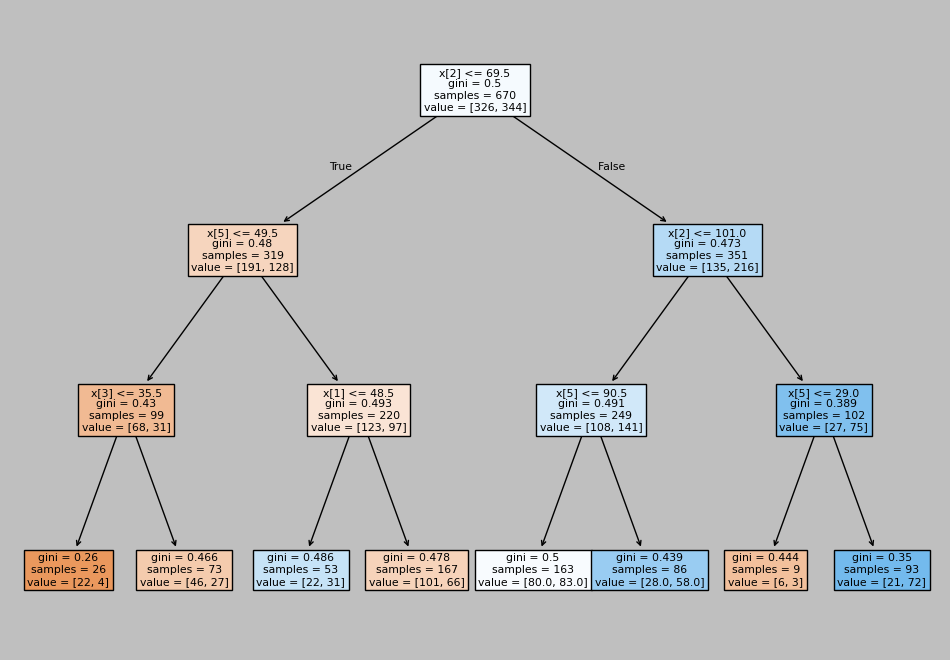

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.style.use('classic')

# 繪製決策樹
plt.figure(figsize=(12,8), dpi=100)
plot_tree(clf, filled=True)
plt.show()

特徵重要性： [0.         0.08871568 0.59625022 0.05482142 0.         0.26021268]
特徵名稱： Index(['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')


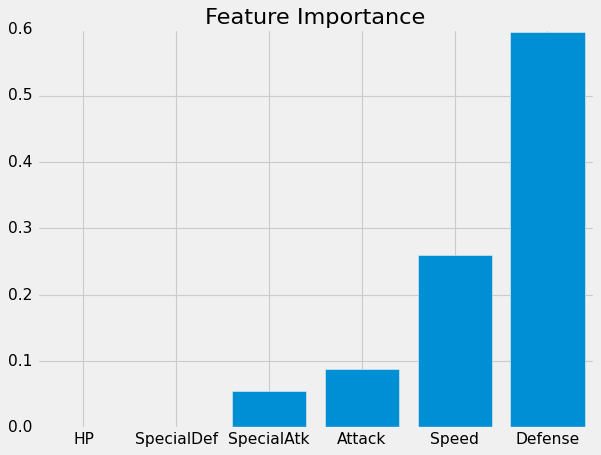

In [3]:
import numpy as np
plt.style.use('fivethirtyeight')

print('特徵重要性：', clf.feature_importances_)
print('特徵名稱：', X.columns)

# 取出特徵重要性與排序後的索引值
idx = np.argsort(clf.feature_importances_)

# 放置柱狀圖的橫軸位置
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# 由小到大繪製特徵重要性的柱狀圖
plt.bar(tree_indices, clf.feature_importances_[idx])
plt.xticks(tree_indices, labels=X.columns[idx], fontsize=14)
plt.xlim((0, len(clf.feature_importances_)))
plt.title('Feature Importance')
plt.show()

實作決策樹模型，主要靠底下兩個超參數來防止過度擬合：
- min_samples_split (最小分割樣本數)
  - 一個節點的最小分割樣本數，也就是說節點的樣本數若少於 min_sample_split 將不再進行分割，即此節點為葉節點。
- max_depth (最小樹深度)
  - 決策樹的最大深度，設定值為整數，預設值是 None，代表這棵樹將一直成長直到所有葉節點內只剩下單一類別或是節點內的樣本數少於 min_samples_split。

在決策樹建模過程中，也有兩個策略可避免過度擬合，一個是預修剪 (Pre-pruning)，也就是提早停止樹的生長，另一個是後修剪 (Post-pruning)，亦即是讓樹生長完成後，再移除一些節點來避免過度擬合。

預剪修除了用上述兩個參數，也可以用 min_weight_fraction_leaf 考慮在葉節點所有樣本權重總和的最小加權比。後修剪則是透過 ccp_alpha 來控制，ccp_alpha 是一個非負數，當它大於 0 時，會對樹進行後修剪，ccp_alpha 的值越大，修剪的節點越多，樹的複雜度越低，避免過度擬合。

參考連結: [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

[0.         0.00031983 0.00049751 0.00049751 0.00094764 0.00095949
 0.0009821  0.00119403 0.00119403 0.00119403 0.00124378 0.00124378
 0.00124378 0.00130404 0.00130597 0.0013267  0.00134328 0.00134328
 0.00136816 0.00137313 0.00138198 0.00138593 0.00138593 0.00141398
 0.00144731 0.00149254 0.00155473 0.00179104 0.00179104 0.00199005
 0.00199005 0.00199005 0.00199005 0.00199005 0.00199005 0.00199005
 0.00199005 0.00199005 0.00199005 0.00201493 0.00204108 0.00212272
 0.00212272 0.00215101 0.00219374 0.0021981  0.00221542 0.00223881
 0.00223881 0.00223881 0.00223881 0.00223881 0.00223881 0.00223881
 0.00223881 0.00225626 0.00237934 0.00238806 0.00239872 0.00241868
 0.0024749  0.00248756 0.00248756 0.00248756 0.0025239  0.0025312
 0.00253494 0.0025441  0.00255864 0.00260516 0.00264586 0.0026534
 0.0026534  0.00272339 0.00272824 0.00278113 0.00283103 0.00287846
 0.00296047 0.00298507 0.00315778 0.00318408 0.00318938 0.00322007
 0.00333046 0.00345772 0.00354726 0.00363013 0.00378292 0.004194

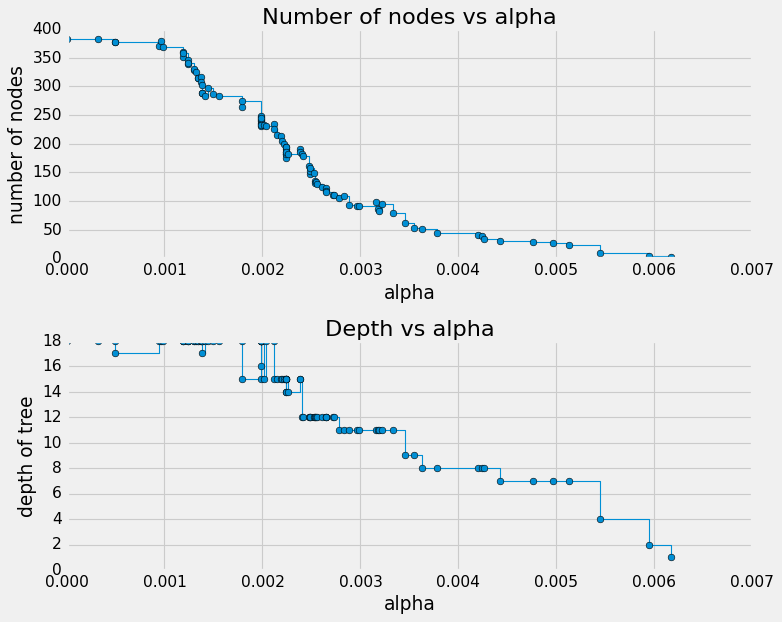

In [4]:
# 參考來源 https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
clf = DecisionTreeClassifier()

# 依最小成本修剪方式計算修剪過程
path = clf.cost_complexity_pruning_path(X_train, y_train)

# 回傳修剪過程的有效 alpha 值
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

# 放置決策樹的列表
clfs = []

# 依照每個 alpha 值建立決策樹
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
# 過濾掉最後只剩一個節點的決策樹，因為這個決策樹不會有任何分類效果
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# 決策樹的節點數量
node_counts = [clf.tree_.node_count for clf in clfs]

# 決策樹的深度
depth = [clf.tree_.max_depth for clf in clfs]

# 繪製節點數量與深度的關係
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# 繪製節點數量與 alpha 的關係
ax[0].plot(ccp_alphas, node_counts, marker='o', lw=1, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# 繪製深度與 alpha 的關係
ax[1].plot(ccp_alphas, depth, marker='o', lw=1, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

# 調整子圖間距
fig.tight_layout()

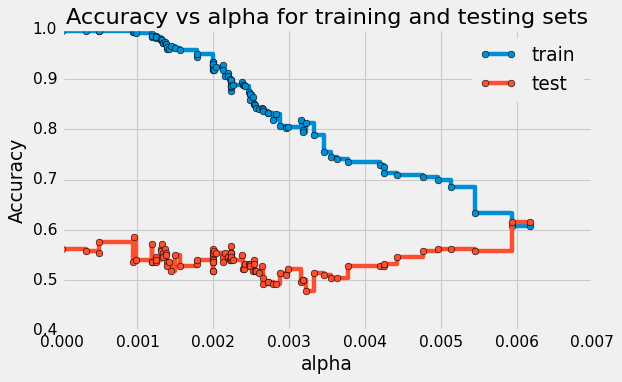

In [5]:
# 訓練集的準確率
train_scores = [clf.score(X_train, y_train) for clf in clfs]

# 測試集的準確率
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# 繪製 alpha 與準確率的關係
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
fig.tight_layout()

## 隨機森林 (Random Forest)
- 是一種基於多個決策樹的集成學習 (ensemble learning) 方法，通常用於分類和迴歸任務。隨機森林是由多個隨機生成的決策樹組成的「森林」(每棵決策樹都是獨立的)，通過對每棵樹的結果進行投票或平均來得出最終的預測結果。這種方法能有效提高模型的準確性和穩定性，並減少過度擬合的風險。
- 隨機森林使用了一種稱為「袋裝法」（Bagging，Bootstrap aggregating）的技術，即在訓練時對樣本進行隨機抽樣，每棵樹都會接收到不同的樣本集。此過程包含以下幾個特點：
  - 樣本隨機選擇：從訓練數據中隨機選擇一部分樣本（有放回抽樣）用於訓練每棵樹，這能引入多樣性。
  - 特徵隨機選擇：對每個節點，隨機選擇一部分特徵進行分裂，而不是使用所有特徵，這進一步增強了模型的多樣性。

建構隨機森林的過程可簡單歸納如下：
- 從訓練樣本中採用取後放回抽樣 (sampling with replacement) 隨機挑選部分樣本，產生一個隨機自助樣本集 (bootstrap sample)。
- 對自助樣本集建構決策樹，且在每一個節點：
  - 採用取得不放回抽樣 (sampling without replacement) 隨機挑選部分特徵。
  - 透過上述特徵尋找最大化資訊增益 (information gain) 的節點分割方式。
- 重複上述兩個步驟幾次，每次建立一棵決策樹。
- 每棵決策樹皆產出預測結果，且依問題種類整合結果後輸出：
  - 分類問題可用多數決 (majority voting) 來決定最終預測結果 (類別標籤)。
  - 迴歸問題可用平均值來決定最終預測結果 (數值)。

隨機森林的特色
- 多樣性：通過隨機選擇樣本和特徵來構建多棵不同的決策樹，這樣每棵樹的結構都不完全相同，從而提升模型的泛化能力。
- 投票機制：對於分類問題，隨機森林通過「多數投票」確定最終分類結果；對於迴歸問題，則通過「平均」所有樹的輸出來得到最終的預測值。

隨機森林的優點
- 減少過度擬合：單棵決策樹容易過度擬合，而隨機森林由多棵樹組成，並且通過樣本和特徵隨機選擇，使模型對噪聲的敏感性降低。
- 較高的準確性：隨機森林的集成效果通常能提高模型的準確率，尤其在資料集較為複雜時，效果尤為顯著。
- 容錯性強：由於隨機森林是多個模型的集成，即使其中幾棵樹的表現不佳，最終結果仍然有較高的準確性。
- 處理高維數據：隨機森林在特徵較多時仍能保持穩定的性能，因為每個分支只選擇一部分特徵進行分割。
- 特徵重要性評估：隨機森林能提供特徵重要性評估，便於理解模型中哪些特徵對預測結果最為重要。

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 建立隨機森林分類器
clf = RandomForestClassifier(max_depth=3, n_jobs=-1)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 產生分類報告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.57      0.55        95
           1       0.66      0.62      0.64       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



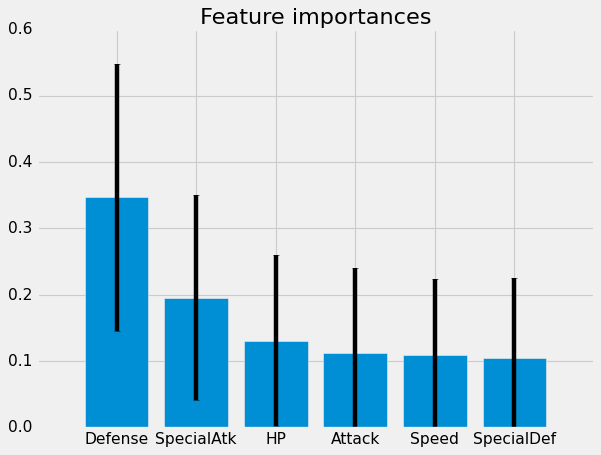

In [7]:
# 特徵重要性
importances = clf.feature_importances_

'''
# 查看第一棵樹的細節
first_tree = clf.estimators_[0]
print(first_tree)
'''

# 標籤名稱 (t 指的是隨機森林中的每一棵樹)
std = np.std([t.feature_importances_ for t in clf.estimators_], axis=0)

# 取出特徵重要性與排序後的索引值
idx = np.argsort(importances)[::-1]

# 繪製特徵重要性的柱狀圖
plt.title("Feature importances")
plt.bar(
    range(X.shape[1]), 
    importances[idx], 
    yerr=std[idx], 
    align="center"
)
plt.xticks(range(X.shape[1]), labels=X.columns[idx])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.6])
plt.show()

In [8]:
from sklearn.feature_selection import SelectFromModel

# 建立特徵選取器，門檻值預設為重要性的平均值
selector = SelectFromModel(clf)

# 訓練特徵選取器
selector.fit(X_train, y_train)

print('門檻值 =', selector.threshold_)
print('特徵列表：', X.columns)
print('特徵遮罩：', selector.get_support())

# 選出訓練集的新特徵
X_train_new = selector.transform(X_train)

# 用訓練集的新特徵重新訓練隨機森林
clf.fit(X_train_new, y_train)

# 選出測試集的新特徵
X_test_new = selector.transform(X_test)

# 預測測試集
y_pred = clf.predict(X_test_new)

# 產生分類報告
print(classification_report(y_test, y_pred))

門檻值 = 0.16666666666666666
特徵列表： Index(['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')
特徵遮罩： [False False  True  True False False]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        95
           1       0.66      0.55      0.60       129

    accuracy                           0.58       224
   macro avg       0.58      0.58      0.57       224
weighted avg       0.59      0.58      0.58       224



## K-NN (K-Nearest Neighbors)
概念
- KNN 的核心概念是透過計算數據點之間的距離，找出與待分類或待預測數據點距離最近的 K 個鄰居，並根據這些鄰居的屬性進行預測。例如，在分類任務中，KNN 根據鄰居的多數類別來決定待分類數據點的類別；在迴歸任務中，則根據鄰居的值進行加權平均來得出預測值。

特色
- 距離度量：KNN 通常使用歐幾里得距離，但也可以選用其他距離度量（如曼哈頓距離），這會影響 KNN 的結果。
- 非參數模型：KNN 不需要訓練過程或參數估計。只需保存數據集並在查詢時執行計算，因此適合不易定義函數關係的數據。
- 延遲學習（Lazy Learning）：KNN 是一種延遲學習算法，不會進行顯式的模型訓練。每次預測時直接對數據進行查詢計算，當數據量龐大時可能會增加計算負擔。

可調參數
- K：K 值的選擇對模型性能有很大影響，小 K 值更易受噪音影響，而大 K 值會導致模型過於平滑，容易忽視局部特徵。

優點
- 簡單易理解：KNN 的原理非常直觀，易於實現和解釋，尤其適合初學者了解機器學習基礎。
- 無需訓練模型：由於 KNN 屬於延遲學習，不需訓練過程，只需保存數據和在預測時查詢即可。
- 靈活性：KNN 可以應用於分類和迴歸，適用於多種應用場景。
- 適用於小型數據集：由於 KNN 是基於距離的算法，對於小型數據集來說效果較好，可以有效利用少量的標記數據進行預測。

### K-最近鄰分類器（K-Nearest Neighbors Classifier）
- 是一種簡單且直觀的非參數機器學習方法，主要用於分類和迴歸任務。K-NN 通過計算樣本之間的距離，選擇與待分類樣本最接近的 K 個鄰居，並根據這些鄰居的標籤進行預測。K-NN 沒有顯式的訓練階段，僅在預測時使用整個訓練數據集，因此屬於「基於實例」的學習方法。

K-NN 的基本概念
- 在 K-NN 中，給定一個待分類的樣本，K-NN 會計算該樣本與訓練集中所有樣本之間的距離（如歐幾里得距離），然後選取 K 個距離最近的鄰居。
- 最後，根據這些鄰居的標籤進行分類，通常使用「多數投票」的方式來決定最終的分類結果。
- 當票數相同時，scikit-learni 會選擇跟觀察值距離最近的樣本的類別；若有多個最近鄰樣本與觀察值等距，則選擇最先找到的樣本的類別。

K-NN 的特色
- 基於距離進行分類：K-NN 是通過樣本之間的距離來判斷樣本所屬的類別，因此它能夠捕捉到數據中的局部模式。
- 簡單直觀：K-NN 算法直觀且易於理解，僅僅依賴距離計算，沒有太多參數調整。
- 懶惰學習算法：K-NN 沒有顯式的訓練階段，所有計算在預測階段完成，這種「懶惰學習」方式可以節省訓練時間，但預測可能會較慢。

K-NN 的優點
- 簡單易懂：K-NN 算法直觀且實現簡單，不需要對數據進行大量的預處理。
- 適用於多類分類：K-NN 可以自然地應用於多類分類，無需進行特殊的調整。
- 非參數方法：K-NN 沒有假設數據的分佈形式，適用於非線性數據和異質數據，具有較強的靈活性。
- 適合小數據集：由於 K-NN 須要計算距離，當數據量較大時會增加計算量。因此在數據量較小的情況下，它的效果和效率會更佳。

![](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

K = 3 的時候，被分類為綠色的樣本數最多，所以預測結果為綠色；K = 6 的時候，被分類為藍色的樣本數最多，所以預測結果為藍色。

參考來源: [https://www.jcchouinard.com/k-nearest-neighbors/](https://www.jcchouinard.com/k-nearest-neighbors/)

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 特徵標準化
scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)

# 建立最近鄰模型
neighbors = NearestNeighbors(n_neighbors=3)
neighbors = neighbors.fit(X_train_std)

# 未知寶可夢的屬性
new_poke = [
    [120, 50, 80, 100, 150, 90]
]

# 標準化
new_poke_std = scale.transform(new_poke)

# 取出最近鄰的距離與索引值
dist, idx = neighbors.kneighbors(new_poke_std)
print(dist)
print(idx)

# 顯示最近鄰的寶可夢
for d, i in enumerate(idx[0]):
    print(
        df.iloc[i, 1], # 取得寶可夢的名稱
        np.array(X_train.iloc[i, :]),  # 取得寶可夢的特徵所代表的值
        f'，標準化後的距離 = {dist[0][d]:.3f}'
    )

[[1.62261621 1.6422178  1.72989459]]
[[ 88 265  65]]
小磁怪 [100  77  77 128 128  90] ，標準化後的距離 = 1.623
幼基拉斯 [109  53  47 127 131 103] ，標準化後的距離 = 1.642
蚊香蝌蚪 [ 95  65  65 110 130  60] ，標準化後的距離 = 1.730


d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 分類器，預設 k=5
knn = KNeighborsClassifier()

# 訓練模型
knn.fit(X_train_std, y_train)

# label 列表 [0, 1]
print(knn.classes_)

# 輸出預測結果
print(knn.predict(new_poke_std))

# 輸出預測結果的機率
print(knn.predict_proba(new_poke_std))

print('0 的機率:', knn.predict_proba(new_poke_std)[0][0])
print('1 的機率:', knn.predict_proba(new_poke_std)[0][1])

[0 1]
[0]
[[0.6 0.4]]
0 的機率: 0.6
1 的機率: 0.4


如果半徑 r=2 裡面沒有其它訓練數據的點，那麼若有新的觀察值 (樣本點) 落在這個區域，即視為 outlier。

In [14]:
from sklearn.neighbors import RadiusNeighborsClassifier

# 建立半徑鄰分類器，設定離群值類別為 2
rn = RadiusNeighborsClassifier(
    radius=2, # 半徑，單位是標準差
    outlier_label=2 # 離群值類別D
)

# 訓練模型
rn.fit(X_train_std, y_train)

# label 列表 [0, 1]
print(knn.classes_)

# 預測未知寶可夢的屬性
print(rn.predict(new_poke_std))

# 預測未知寶可夢的機率
print(rn.predict_proba(new_poke_std))

# 故意測試一個離群值
print(rn.predict([
    [3.0, 3.0, 3.0, 1.0, 1.0, 1.0]
]))

[0 1]
[0]
[[0.57142857 0.42857143]]
[2]


d:\anaconda3\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
